In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read dat from dataset in Github
insurance_Dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
print(insurance_Dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
#due computer unknow charactor, so we change it to number,  such as yes = 1, no =0
insurance_one_hot = pd.get_dummies(insurance_Dataset)
print(insurance_one_hot.head)

<bound method NDFrame.head of       age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_no

In [ ]:
# We seperate Charges out of dataset
# And we get Charges to output
x = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [ ]:
print(x.head())

   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  


In [ ]:
print(y.head())

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [ ]:
# This module will seperate Test set out of Dev test
from sklearn.model_selection import train_test_split

In [ ]:
 # we get test set = 20% of all data set
 # And we random hook value from data set 20 value
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Vlaue of Test set and Train set seperated
print(x.shape, x_Train.shape, x_Test.shape)

(1338, 11) (1070, 11) (268, 11)


In [ ]:
# Set random value = 42
tf.random.set_seed(42)
# Create model
insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)]) # Dense is point in layers or hidden layers

In [ ]:
#Compile model for get Loss use SGD Algorithm
insurance_model.compile(loss = 'mae', optimizer = tf.keras.optimizers.SGD(), metrics = ['mae'])

In [ ]:
# Train model_1
model_1 = insurance_model.fit(x_Train, y_Train, epochs = 100) #model_1 = insurance_model.fit(input, output], epochs = จำนวนรอบ)

Epoch 1/100
34/34 [==============================] - 1s 841us/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 820us/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 829us/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 825us/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 871us/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 812us/step - loss: 7578.0859 - mae: 7578.0859
Epoch 7/100
34/34 [==============================] - 0s 820us/step - loss: 7514.6172 - mae: 7514.6172
Epoch 8/100
34/34 [==============================] - 0s 887us/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 882us/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 837us/step - loss: 7735.9

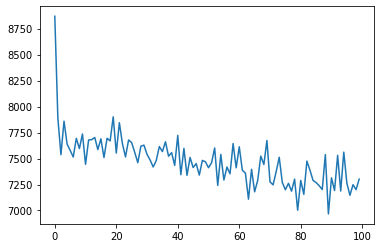

In [ ]:
plt.plot(model_1.history['loss'])

In [ ]:
# Add Dense for complexity of model and Accurate
insurance_model_new = tf.keras.Sequential([
    # Layer 1
    tf.keras.layers.Dense(100),
    #Layer 2
    tf.keras.layers.Dense(50),
    #Layer 3 is output, so Dense must = number of output parameter (1)
    tf.keras.layers.Dense(1)
    ])

In [ ]:
# We don't want adjust parameters, we just change algorithm for training (Adam Algorithm)
insurance_model_new.compile(loss = 'mae', optimizer = 'Adam', metrics = 'mae')

In [ ]:
model_2 = insurance_model_new .fit(x_Train, y_Train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13220.3398 - mae: 13220.3398
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12756.2432 - mae: 12756.2432
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 11507.5127 - mae: 11507.5127
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 9291.9990 - mae: 9291.9990
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7651.2310 - mae: 7651.2310
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7435.3047 - mae: 7435.3047
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7401.6226 - mae: 7401.6226
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7368.9351 - mae: 7368.9351
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7335.0869 - mae: 7335.0869
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7302.7124 - mae: 730

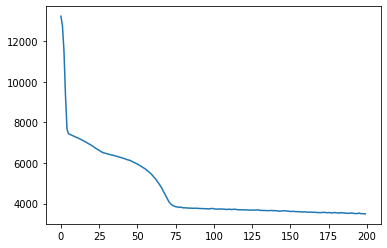

In [ ]:
plt.plot(model_2.history['loss'])